<a href="https://colab.research.google.com/github/yash-3/machine-learning/blob/main/Linear_Regression_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task: Perform Linear Regression.

In [ ]:
import numpy as np      #To Prform Numerical Operation
import matplotlib.pyplot as plt   #plot something 
import pandas as pd     #To Play With Dataset

In [ ]:
from google.colab import drive  #import gogle drive data

In [ ]:
drive.mount('/content/drive') # mount drive data into colab cloud and enter authentication code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/Dataset Files"  

/content/drive/My Drive/Colab Notebooks/Dataset Files


In [ ]:
dataset=pd.read_csv("train.csv")
print(dataset)
dataset.shape

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


(700, 2)

In [ ]:
dataf=pd.DataFrame(dataset)  #to check description of dataset
dataf.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [ ]:
x_val = dataf.iloc[0:700,0:1]

In [ ]:
y_val = dataf.iloc[0:700,1:2]

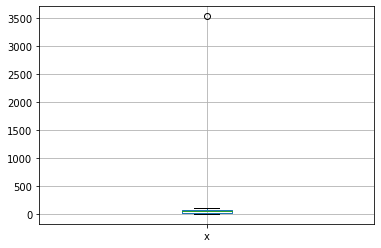

In [ ]:
x_box = x_val.boxplot(column=['x'])

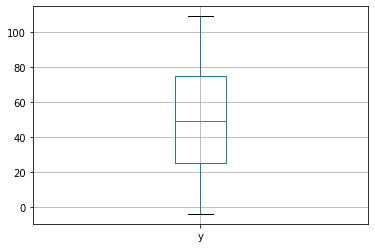

In [ ]:
y_box = y_val.boxplot(column=['y'])

Text(0.5, 1.0, 'Scatter Plot')

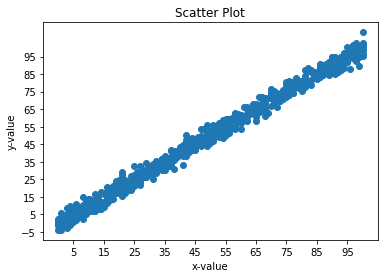

In [ ]:
plt.scatter(x_val,y_val)
plt.xticks(np.arange(5,100,step=10))
plt.yticks(np.arange(-5,100,step=10))
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.title("Scatter Plot")

In [ ]:
#define Hypothesis
#H(x) = theta_array[0] + theta_array[1]*x
def hypothesis(theta_array,x):   # theta_array=[theta_array[0],theta_array[1]]
    return theta_array[0] + theta_array[1]*x

In [ ]:
def cost_function(theta_array,x,y,m):
    total_error = 0
    for i in range(m):
        total_error+=(theta_array[0]+theta_array[1]*x[i] - y[i])**2

    return total_error/(2*m)


In [ ]:
def gradient_descent(theta_array,x,y,alpha,m):
    summation_0 = 0
    summation_1 = 0
    for i in range(m):
        summation_0 += ((theta_array[0]+theta_array[1]*x[i])-y[i])
        summation_1 += ((theta_array[0]+theta_array[1]*x[i])-y[i])*x[i]

    new_theta_0 = theta_array[0]-alpha * (summation_0/m)
    new_theta_1 = theta_array[1]-alpha * (summation_1/m)

    updated_theta_array = [new_theta_0,new_theta_1]
    print(updated_theta_array)
    return updated_theta_array


In [ ]:
def training(x,y,alpha,iters):
    theta_0 =0
    theta_1 =0
    theta_array = [theta_0,theta_1]

    m=x.size              #size of dataset  
    cost_function_values=[]         

    for i in range(iters):
        theta_array= gradient_descent(theta_array,x,y,alpha,m)

        cost_function_values.append(cost_function(theta_array,x,y,m))
        if(i%5 == 0):
            y_new = x*theta_array[1]+theta_array[0]   #linear regression line equation
            plt.plot(x,y_new,'r')
            plt.xlabel("x-value")
            plt.ylabel("y-value")
            plt.scatter(x,y)
            plt.show()

    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost Value")
    plt.title("Cost Function curve")
    plt.show()



In [ ]:
training_data = pd.read_csv("train.csv")
cleaning_dataset = training_data.dropna()   #remove data which is not a number
cleaning_dataset

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [ ]:
x_train = cleaning_dataset['x']
y_train = cleaning_dataset['y']

In [ ]:
x_val = x_train.values.reshape(x_train.size)            #for reset value
y_val = y_train.values.reshape(y_train.size)

[0.004993986917045777, 0.33354245845185393]


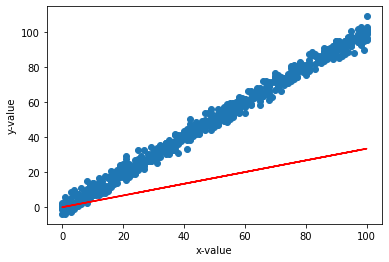

[0.008319284972241507, 0.5557035214498389]
[0.010533127355656105, 0.7036773052035968]
[0.012006667742524584, 0.802237518771347]
[0.012987118705779474, 0.8678850693676076]
[0.01363913995457534, 0.9116106382126297]


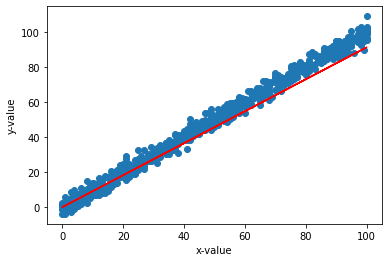

[0.01407240560255935, 0.9407347363616418]
[0.014359965767857034, 0.9601333019877012]
[0.014550476597125737, 0.9730540281668936]
[0.014676346259828743, 0.9816600904650489]
[0.01475916071211147, 0.9873923049996323]


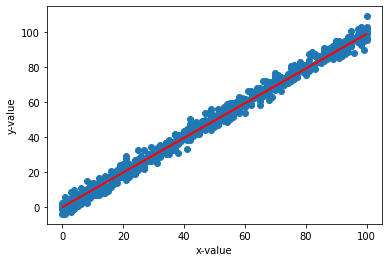

[0.014813297609683014, 0.9912103493470457]
[0.01484833340967559, 0.993753431411396]
[0.01487064665759465, 0.9954473053779638]
[0.014884485881074296, 0.9965755513231513]
[0.014892680876819898, 0.9973270520871346]


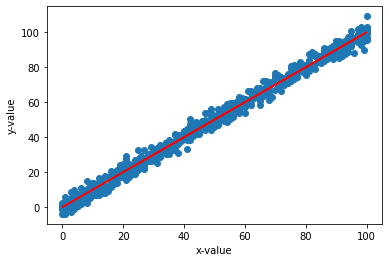

[0.01489711647413762, 0.9978276159698669]
[0.014899048092367667, 0.9981610395106341]
[0.014899311922731282, 0.9983831366740062]
[0.01489846492315943, 0.9985310832033687]
[0.014896878063986173, 0.9986296405702794]


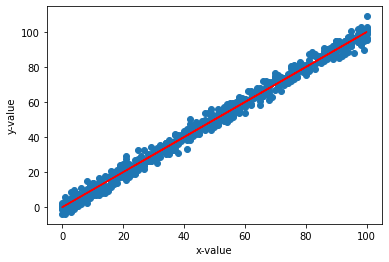

[0.014894798435666618, 0.9986953015309791]
[0.01489239061657083, 0.9987390513376072]
[0.014889764226634673, 0.9987682068850972]
[0.014886992279889691, 0.9987876417030486]
[0.014884123408445882, 0.9988006018802705]


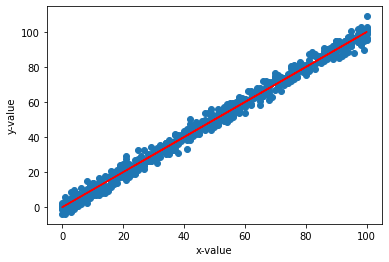

[0.014881190004462082, 0.9988092495237824]
[0.014878213643229672, 0.9988150247379799]
[0.014875208695300289, 0.9988188867263863]
[0.014872184732398647, 0.9988214743811554]
[0.014869148129917511, 0.9988232132461622]


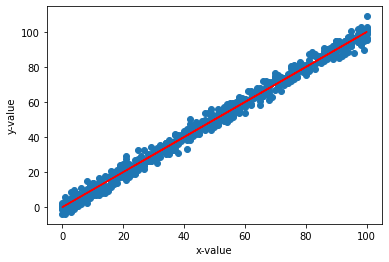

[0.014866103134283944, 0.9988243867614027]
[0.014863052573894888, 0.9988251837164145]
[0.014859998332646675, 0.9988257298573517]
[0.014856941665336583, 0.9988261089393607]
[0.014853883407740857, 0.9988263767488356]


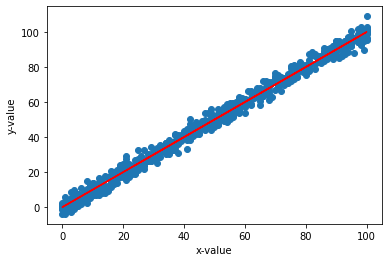

[0.014850824116540384, 0.998826570443156]
[0.014847764162520326, 0.9988267147715622]
[0.014844703792647162, 0.9988268262186631]
[0.014841643171416043, 0.998826915764285]
[0.014838582408390833, 0.9988269907217081]


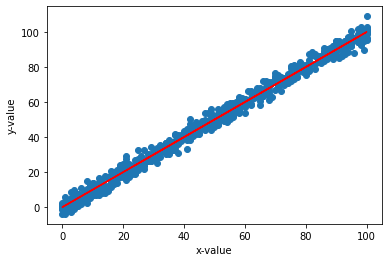

[0.014835521576547574, 0.9988270559620549]
[0.014832460724492432, 0.9988271147298107]
[0.014829399884599642, 0.9988271691860144]
[0.014826339078431916, 0.9988272207700593]
[0.014823278320350786, 0.9988272704406749]


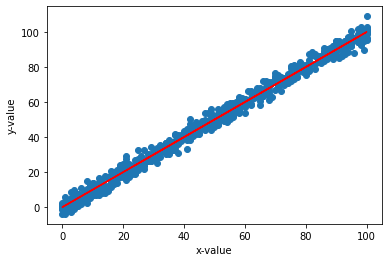

[0.014820217619921328, 0.9988273188364378]
[0.01481715698351386, 0.9988273663826819]
[0.014814096415370794, 0.9988274133627071]
[0.014811035918317205, 0.9988274599652097]


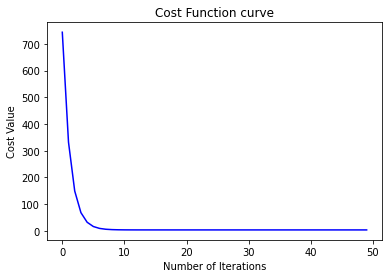

In [ ]:
alpha=0.0001
iter=50
training(x_val,y_val,alpha,iter)